In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

from main import Simulation

from warnings import filterwarnings
filterwarnings('default')

%matplotlib inline

In [2]:
plt.rcParams["font.size"] = 18
plt.rcParams["figure.facecolor"] = "white"

## Reduced big matrix element globally

In [3]:
sim_1 = Simulation(
    contact_data_file="dynmatrix_step_1d_window_7d_v8_avg.csv",
    contact_num_data_file ="dynmatrix_step_1d_window_7d_v8_contactnum.csv"
)

sim_2 = Simulation(
    contact_data_file="dynmatrix_step_1d_window_7d_v8_avg_corrected.csv",
    contact_num_data_file ="dynmatrix_step_1d_window_7d_v8_contactnum.csv"
)

# Call simulate() method to get r_eff values for the contact matrices
sim_1.simulate()
sim_2.simulate()

In [4]:
# Calculate datetime from simulation point timestamps for plotting purposes
t1 = [datetime.fromtimestamp(t) for t in sim_1.timestamps]
t2 = [datetime.fromtimestamp(t) for t in sim_2.timestamps]

In [5]:
# data from the webpage of Ferenci Tamas
df = sim_1.data.reference_r0_data

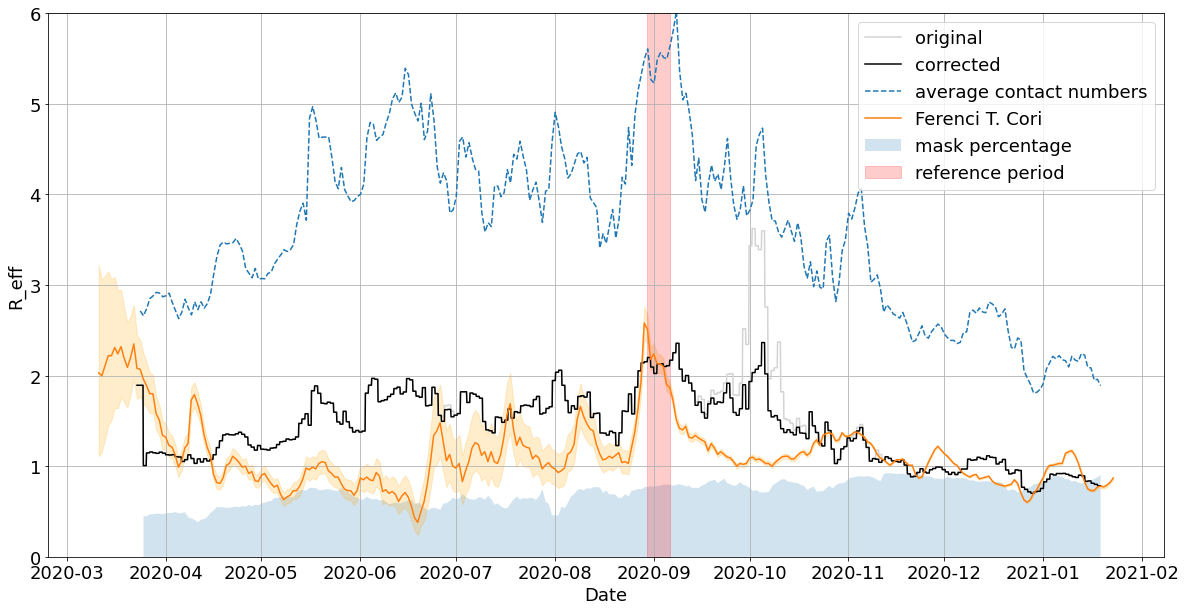

In [7]:
plt.figure(figsize=(20,10))

# simulated R-values
plt.plot(t1,sim_1.r_eff_plot,label="original",color="lightgrey")
plt.plot(t2,sim_2.r_eff_plot,label="corrected", color="black")

# average contact numbers
plt.plot(
    [datetime.fromtimestamp(t) for t in sim_1.data.contact_num_data["start"]], 
    sim_1.data.contact_num_data["outside"]+sim_1.data.contact_num_data["family"],
    '--',
    label="average contact numbers")

# masks
plt.fill_between(
    [datetime.fromtimestamp(t) for t in sim_1.data.contact_num_data["start"]], 
    sim_1.data.contact_num_data['mask_percentage'].map(float),
    alpha=0.2,
    label="mask percentage")

# reference R-values from Tamas Ferenci
for m in df["method"].unique()[[1]]:
    sdf = df[df["method"]==m]
    plt.plot(sdf["datetime"],sdf["r0"], label="Ferenci T. "+m)
    plt.fill_between(sdf["datetime"],sdf["ci_lower"],sdf["ci_upper"],color='orange',alpha=0.2)
    
# reference R_0 period
d1,d2 =  sim_2.baseline_cm_date
plt.fill_betweenx(
    np.linspace(0,6,100),
    datetime.strptime(d1,'%Y-%m-%d'), 
    datetime.strptime(d2,'%Y-%m-%d'),
    color='r',
    alpha=0.2,
    label="reference period")
    
# formatting
plt.xlabel("Date")
plt.ylabel("R_eff")
plt.ylim(0,6)
plt.grid()
plt.legend()

## Old and new data

In [8]:
sim_1 = Simulation(
    contact_data_file="dynmatrix_step_1d_window_7d_v6_avg_corrected.csv",
    contact_num_data_file ="dynmatrix_step_1d_window_7d_v6_contactnum.csv"
)

sim_2 = Simulation(
    contact_data_file="dynmatrix_step_1d_window_7d_v8_avg_corrected.csv",
    contact_num_data_file ="dynmatrix_step_1d_window_7d_v8_contactnum.csv"
)

# Call simulate() method to get r_eff values for the contact matrices
sim_1.simulate()
sim_2.simulate()

# Calculate datetime from simulation point timestamps for plotting purposes
t1 = [datetime.fromtimestamp(t) for t in sim_1.timestamps]
t2 = [datetime.fromtimestamp(t) for t in sim_2.timestamps]

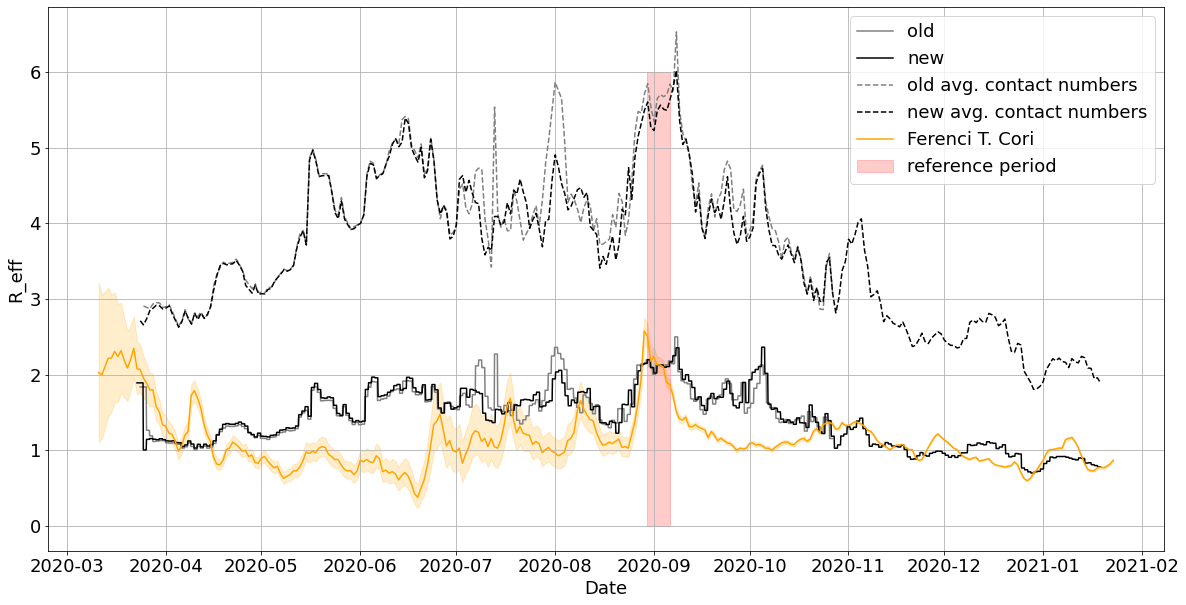

In [9]:
plt.figure(figsize=(20,10))

# simulated R-values
plt.plot(t1,sim_1.r_eff_plot,label="old",color="grey")
plt.plot(t2,sim_2.r_eff_plot,label="new", color="black")

# average contact numbers
plt.plot(
    [datetime.fromtimestamp(t) for t in sim_1.data.contact_num_data["start"]], 
    sim_1.data.contact_num_data["outside"]+sim_1.data.contact_num_data["family"],
    '--',
    color='grey',
    label="old avg. contact numbers")
plt.plot(
    [datetime.fromtimestamp(t) for t in sim_2.data.contact_num_data["start"]], 
    sim_2.data.contact_num_data["outside"]+sim_2.data.contact_num_data["family"],
    '--',
    color='black',
    label="new avg. contact numbers")

# reference R-values from Tamas Ferenci
for m in df["method"].unique()[[1]]:
    sdf = df[df["method"]==m]
    plt.plot(sdf["datetime"],sdf["r0"], label="Ferenci T. "+m,color='orange')
    plt.fill_between(sdf["datetime"],sdf["ci_lower"],sdf["ci_upper"],color='orange',alpha=0.2)
    
# reference R_0 period
d1,d2 =  sim_2.baseline_cm_date
plt.fill_betweenx(
    np.linspace(0,6,100),
    datetime.strptime(d1,'%Y-%m-%d'), 
    datetime.strptime(d2,'%Y-%m-%d'),
    color='r',
    alpha=0.2,
    label="reference period")
    
# formatting
plt.xlabel("Date")
plt.ylabel("R_eff")
plt.grid()
plt.legend()

## Other features of the class

In [10]:
# If r_eff_calc is False, then for the kth day (k!=0), there are `bin_size` EQUAL numbers
# r_eff_plot[0] appears once
# E.g. for k=10
k = 10
sim_1.r_eff_plot[1 + k * sim_1.bin_size:(k+1) * sim_1.bin_size]

array([1.08602556, 1.08602556, 1.08602556, 1.08602556, 1.08602556,
       1.08602556, 1.08602556, 1.08602556, 1.08602556])

In [11]:
# For r_eff_calc = False, you can filter for unique values
daily_r_eff = sim_1.r_eff_plot[::sim_1.bin_size]
daily_r_eff.shape

(219,)

In [12]:
# Call get_repi_r0_list() to get r_eff values (here is_r_eff_calc is set to False)
# This method fills the member variable repi_r0_list
sim_1.get_repi_r0_list()
sim_1.repi_r0_list

-------- Representative matrices --------
Baseline beta: 0.1273613322446329
For matrix BASELINE eig. val = 17.273688655943765 -> baseline r0 = 2.2
-----------------------------------------
For matrix reference eig. val = 57.63074862280115 -> r0 = 7.3399289228554965
For matrix 04_2020 eig. val = 10.283749564221493 -> r0 = 1.3097520449694122
For matrix 05_2020 eig. val = 10.207891616336124 -> r0 = 1.3000906756653876
For matrix 06_2020 eig. val = 11.568319131809496 -> r0 = 1.4733565364583323
For matrix 08_2020 eig. val = 12.475132761834743 -> r0 = 1.5888495284759394
For matrix 09_2020 eig. val = 17.012010113814355 -> r0 = 2.1666722722545653
For matrix 10_2020 eig. val = 20.379641518905828 -> r0 = 2.59557829451588
For matrix 11_2020 eig. val = 10.304569611004855 -> r0 = 1.3124037138651368
For matrix 12_2020 eig. val = 13.371338953128284 -> r0 = 1.7029915429649731


[7.3399289228554965,
 1.3097520449694122,
 1.3000906756653876,
 1.4733565364583323,
 1.4733565364583323,
 1.5888495284759394,
 2.1666722722545653,
 2.59557829451588,
 1.3124037138651368,
 1.7029915429649731]